<a href="https://colab.research.google.com/github/iftekharchowdhuryJOY/100-Days-of-Python-Code/blob/main/assignmentHW2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

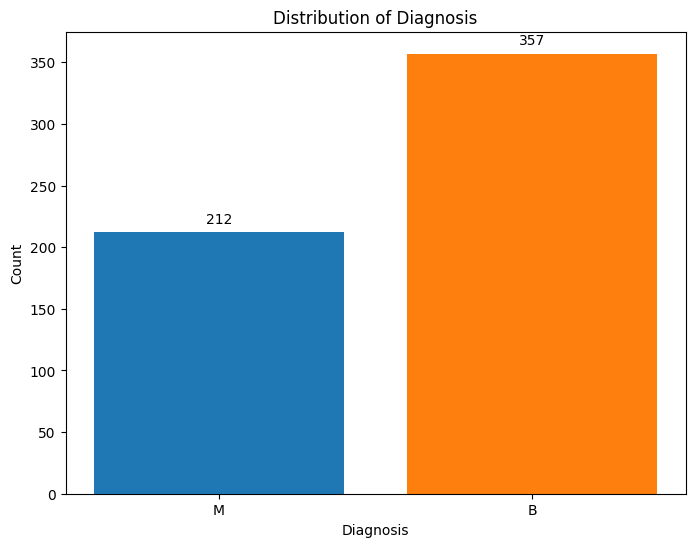

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load the CSV file into a pandas DataFrame
df = pd.read_csv('breast-cancer.csv')

# Count the number of occurrences of each diagnosis
diagnosis_counts = df['diagnosis'].value_counts().sort_index()

# Sort the diagnosis_counts to have 'M' before 'B' if it's not already
if diagnosis_counts.index.tolist() != ['M', 'B']:
    diagnosis_counts = diagnosis_counts.reindex(['M', 'B'])

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['#1f77b4', '#ff7f0e'])

# Add count labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# Set labels and title to match the uploaded image
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')

# Show the plot
plt.show()


In [ ]:
# To apply PCA, we will use the scikit-learn library.
# First, we need to preprocess the data. This involves:
# 1. Removing non-numeric columns.
# 2. Standardizing the feature columns since PCA is affected by scale.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dropping non-numeric columns ('id' and 'diagnosis')
numeric_df = df.drop(['id', 'diagnosis'], axis=1)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

# Applying PCA, by default it will keep all components
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

# The result 'principal_components' is an array where each row corresponds to a sample in the dataset
# and each column corresponds to a principal component.

# Let's turn the principal components into a pandas DataFrame
principal_df = pd.DataFrame(data=principal_components)

# Returning the resulting principal components DataFrame
principal_df.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


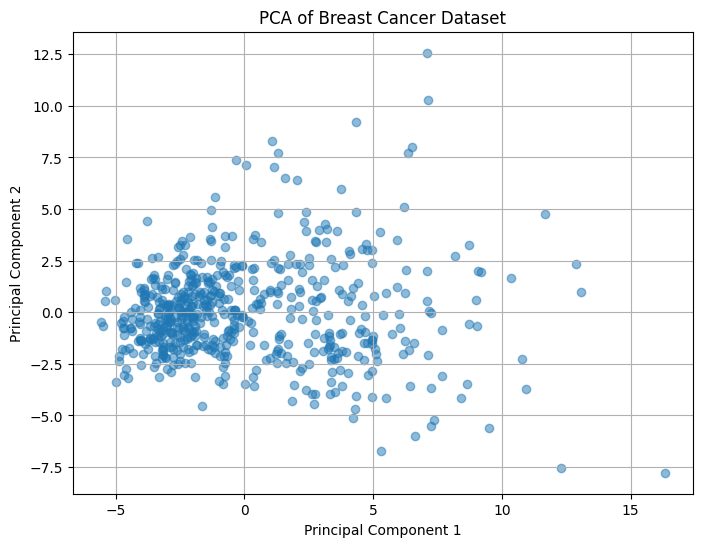

,PC1,PC2
radius_mean,0.218902,-0.233857
texture_mean,0.103725,-0.059706
perimeter_mean,0.227537,-0.215181
area_mean,0.220995,-0.231077
smoothness_mean,0.142590,0.186113
compactness_mean,0.239285,0.151892
concavity_mean,0.258400,0.060165
concave points_mean,0.260854,-0.034768
symmetry_mean,0.138167,0.190349
fractal_dimension_mean,0.064363,0.366575


In [ ]:
# Applying PCA to the dataset to reduce dimensionality and visualizing the first two principal components.

# We will also calculate the explained variance ratio to interpret the visualization.

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

# Applying PCA with two components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Turning the principal components into a pandas DataFrame for visualization
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the visualization of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.grid(True)
plt.show()

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio
explained_variance_ratio

# Display the loadings for the first two PCs
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numeric_df.columns)
loadings


# New Section